In [42]:
from pprint import pprint
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
import nltk
from nltk.tokenize import word_tokenize
import json
import collections
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
random.seed = 23
from nltk.probability import FreqDist

# Задание 1

Читаем наш текст, токенизируем его. После этого разбираем каждый токен с помощью pymorphy и записываем разбор в словарь. После этого получаем список словарей с одинаковыми ключами, создаем датафрейм и выводим первые 20 строк.

In [43]:
lemmas = {}
data = []
with open('we.txt', encoding='utf-8') as fh:
    text = fh.read()
    token = word_tokenize(text)
for word in token:
    if word not in """!#$%^&*()_+:<>?,./\|-;""":
        if word != '...' and word != '--':
            if word != '``' and word != "''":
                ana = morph.parse(word)
                ana = ana[0]
                lemmas['Слово'] = ana.word
                lemmas['лемма'] = ana.normal_form
                lemmas['Часть речи'] = ana.tag.POS
                lemmas['одушевленность'] = ana.tag.animacy
                lemmas['вид'] = ana.tag.aspect
                lemmas['падеж'] = ana.tag.case
                lemmas['род'] = ana.tag.gender
                lemmas['включенность говорящего в действие'] = ana.tag.involvement
                lemmas['наклонение'] = ana.tag.mood
                lemmas['число'] = ana.tag.number
                lemmas['лицо'] = ana.tag.person
                lemmas['время'] = ana.tag.tense
                lemmas['переходность'] = ana.tag.transitivity
                lemmas['залог'] = ana.tag.voice
                data.append(lemmas)
                lemmas = {}
df = pd.DataFrame(data)
df.head(15)

,Слово,Часть речи,вид,включенность говорящего в действие,время,залог,лемма,лицо,наклонение,одушевленность,падеж,переходность,род,число
0,евгений,NOUN,None,None,None,None,евгений,None,None,anim,nomn,None,masc,sing
1,замятин,NOUN,None,None,None,None,замятин,None,None,anim,nomn,None,masc,sing
2,мы,NPRO,None,None,None,None,мы,1per,None,None,nomn,None,None,plur
3,запись,NOUN,None,None,None,None,запись,None,None,inan,nomn,None,femn,sing
4,1-я,NPRO,None,None,None,None,1-я,1per,None,None,nomn,None,None,sing
5,конспект,NOUN,None,None,None,None,конспект,None,None,inan,accs,None,masc,sing
6,объявление,NOUN,None,None,None,None,объявление,None,None,inan,accs,None,neut,sing
7,мудрейшая,ADJF,None,None,None,None,мудрый,None,None,None,nomn,None,femn,sing
8,из,PREP,None,None,None,None,из,None,None,None,None,None,None,None
9,линий,NOUN,None,None,None,None,линия,None,None,inan,gent,None,femn,plur


# Задание 2

Создаем график, показывающий частотность употребления рода.

Text(0.5, 0, 'number of entries')

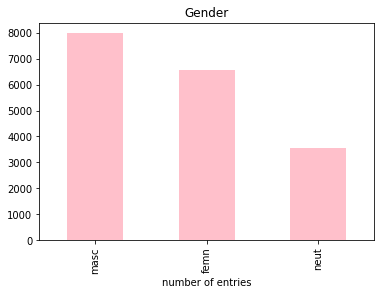

In [44]:
df['род'].value_counts().plot.bar(color='pink');
plt.title('Gender')
plt.xlabel('gender')
plt.xlabel('number of entries')

График частотности чисел:

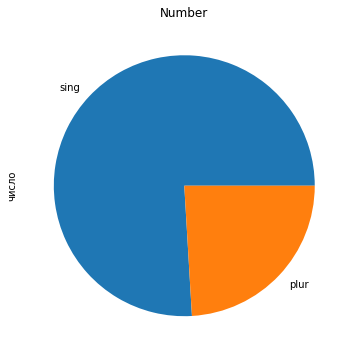

In [45]:
plt.figure(figsize=(6, 6))
df['число'].value_counts().plot(kind='pie');
plt.title('Number');

График длины слов:

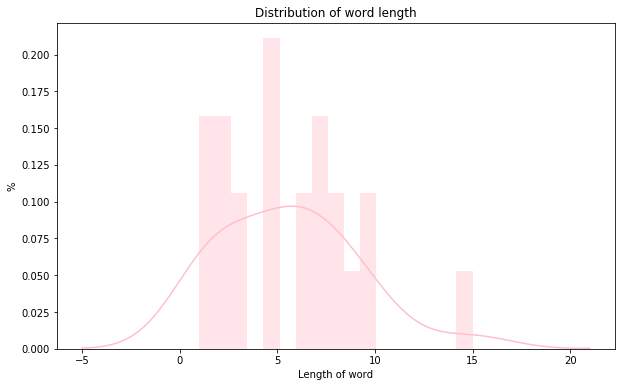

In [46]:
df2['length'] = df['Слово'].apply(len)
plt.figure(figsize=(10, 6))
sns.distplot(df2['length'], bins=17, color='pink')
plt.title('Distribution of word length')
plt.ylabel('%')
plt.xlabel('Length of word');

# Задание 3

Создадим диаграмму десяти самых частотных местоимений в тексте. 

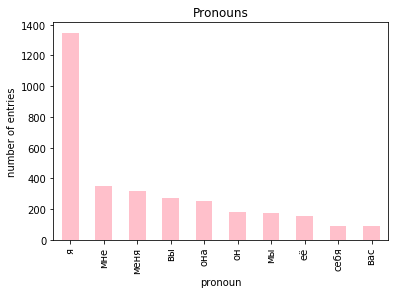

In [47]:
df[df['Часть речи'] == 'NPRO']['Слово'].value_counts().head(10).plot.bar(color='pink');
plt.title('Pronouns')
plt.xlabel('pronoun')
plt.ylabel('number of entries');

Создадим график частотности употребление глагола "быть" в 1, 2 и 3 лицах. 

Text(0.5, 1.0, 'Быть')

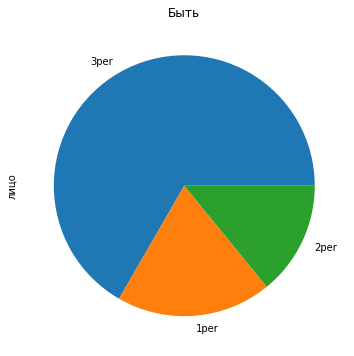

In [48]:
plt.figure(figsize=(6, 6))
df[df['лемма'] == 'быть']['лицо'].value_counts().plot(kind='pie');
plt.title('Быть')


# Задание 4

Выпишем главных героев произведения, токенизируем текст и представим частотность имен героев в виде "Lexical Dispersion Plot".

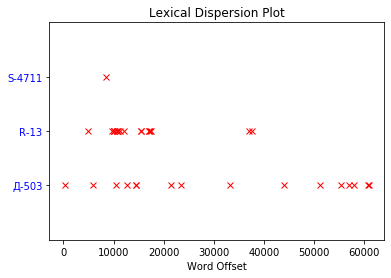

In [49]:
words = ['Д-503', 'R-13', 'S-4711']

with open('we.txt', encoding='utf-8') as fh:
    text = fh.read()
    token = word_tokenize(text)

points = [(x, y) for x in range(len(token))
          for y in range(len(words)) if token[x] == words[y]]
if points:
    x, y = zip(*points)
else:
    x = y = ()
 
plt.plot(x, y, "rx", scalex=.1)
plt.yticks(range(len(words)), words, color="b")
plt.ylim(-1, len(words))
plt.title("Lexical Dispersion Plot")
plt.xlabel("Word Offset")
plt.show()